In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
df= pd.read_csv('Churn_Modelling.csv')

In [3]:
df_final=df.copy()

In [4]:
df_final.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df_final.shape

(10000, 14)

In [7]:
df_final=df_final.drop(columns=['RowNumber','CustomerId','Surname'],axis=1)

In [8]:
df_final.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
encoder=LabelEncoder()

In [11]:
df_final['Geography']=encoder.fit_transform(df['Geography'])
df_final['Gender']=encoder.fit_transform(df['Gender'])

In [12]:
df_final.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [13]:
df_final.sample(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3992,730,1,1,38,0,38848.19,2,0,0,94003.11,0
4251,601,0,1,35,2,0.00,2,1,1,118983.18,0
9072,529,0,1,43,6,93616.35,2,0,0,98348.66,0
3908,655,2,1,37,1,0.00,1,1,1,106040.97,0
7481,626,0,1,34,7,113014.70,2,1,1,56646.28,0
1959,707,0,1,33,8,136678.52,1,1,0,54290.62,0
3004,596,1,1,47,5,140187.10,2,1,1,174311.30,0
1966,681,1,0,48,8,139480.18,1,1,1,163581.67,0
1657,704,1,0,54,6,133656.91,3,1,0,145071.33,1
5987,630,1,0,25,7,79656.81,1,1,0,93524.22,0


In [14]:
df_final=pd.get_dummies(df_final,columns=['Geography'],drop_first=True)

In [15]:
df_final

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_1,Geography_2
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,0,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,1,0


In [16]:
X=df_final.drop(columns=['Exited'],axis=1).values
y=df_final['Exited']

In [17]:
X

array([[6.1900000e+02, 0.0000000e+00, 4.2000000e+01, ..., 1.0134888e+05,
        0.0000000e+00, 0.0000000e+00],
       [6.0800000e+02, 0.0000000e+00, 4.1000000e+01, ..., 1.1254258e+05,
        0.0000000e+00, 1.0000000e+00],
       [5.0200000e+02, 0.0000000e+00, 4.2000000e+01, ..., 1.1393157e+05,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [7.0900000e+02, 0.0000000e+00, 3.6000000e+01, ..., 4.2085580e+04,
        0.0000000e+00, 0.0000000e+00],
       [7.7200000e+02, 1.0000000e+00, 4.2000000e+01, ..., 9.2888520e+04,
        1.0000000e+00, 0.0000000e+00],
       [7.9200000e+02, 0.0000000e+00, 2.8000000e+01, ..., 3.8190780e+04,
        0.0000000e+00, 0.0000000e+00]])

In [18]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler=StandardScaler()

In [21]:
X=scaler.fit_transform(X)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [24]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout


In [25]:
model=Sequential()

In [26]:
X.shape

(10000, 11)

In [27]:
model.add(Dense(32,activation='relu',input_dim=X_train.shape[1]))
model.add(Dropout(0.4))


model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(50,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                384       
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                6

In [29]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [30]:
history= model.fit(X_train,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2) 

Epoch 1/100
128/128 [==============================] - 0s 4ms/step - loss: 0.5307 - accuracy: 0.7861 - val_loss: 0.4870 - val_accuracy: 0.7969
Epoch 2/100
128/128 [==============================] - 0s 2ms/step - loss: 0.4895 - accuracy: 0.7958 - val_loss: 0.4579 - val_accuracy: 0.7969
Epoch 3/100
128/128 [==============================] - 0s 2ms/step - loss: 0.4618 - accuracy: 0.7962 - val_loss: 0.4460 - val_accuracy: 0.7987
Epoch 4/100
128/128 [==============================] - 0s 1ms/step - loss: 0.4531 - accuracy: 0.7994 - val_loss: 0.4382 - val_accuracy: 0.8044
Epoch 5/100
128/128 [==============================] - 0s 2ms/step - loss: 0.4435 - accuracy: 0.8066 - val_loss: 0.4229 - val_accuracy: 0.8125
Epoch 6/100
128/128 [==============================] - 0s 2ms/step - loss: 0.4379 - accuracy: 0.8080 - val_loss: 0.4166 - val_accuracy: 0.8169
Epoch 7/100
128/128 [==============================] - 0s 2ms/step - loss: 0.4306 - accuracy: 0.8075 - val_loss: 0.4114 - val_accuracy: 0.8213

Epoch 58/100
128/128 [==============================] - 0s 1ms/step - loss: 0.3516 - accuracy: 0.8552 - val_loss: 0.3524 - val_accuracy: 0.8556
Epoch 59/100
128/128 [==============================] - 0s 1ms/step - loss: 0.3444 - accuracy: 0.8555 - val_loss: 0.3493 - val_accuracy: 0.8556
Epoch 60/100
128/128 [==============================] - 0s 2ms/step - loss: 0.3466 - accuracy: 0.8573 - val_loss: 0.3532 - val_accuracy: 0.8569
Epoch 61/100
128/128 [==============================] - 0s 2ms/step - loss: 0.3516 - accuracy: 0.8531 - val_loss: 0.3545 - val_accuracy: 0.8556
Epoch 62/100
128/128 [==============================] - 0s 1ms/step - loss: 0.3498 - accuracy: 0.8575 - val_loss: 0.3554 - val_accuracy: 0.8544
Epoch 63/100
128/128 [==============================] - 0s 1ms/step - loss: 0.3444 - accuracy: 0.8572 - val_loss: 0.3542 - val_accuracy: 0.8550
Epoch 64/100
128/128 [==============================] - 0s 2ms/step - loss: 0.3453 - accuracy: 0.8591 - val_loss: 0.3528 - val_accuracy:

In [31]:
y_pred=model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [32]:
from sklearn.metrics import accuracy_score

In [33]:
accuracy_score(y_test,y_pred)

0.8635

In [34]:
v=y_pred>0.5

In [35]:
v

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

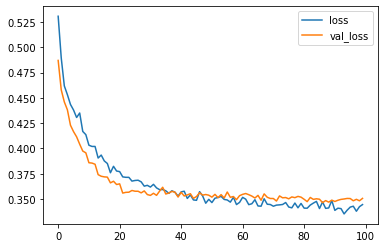

In [36]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()

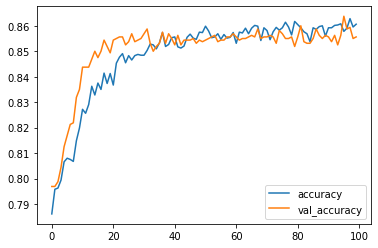

In [37]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()

In [38]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [39]:
cm=confusion_matrix(y_test,v)

In [40]:
cm

array([[1534,   61],
       [ 212,  193]])

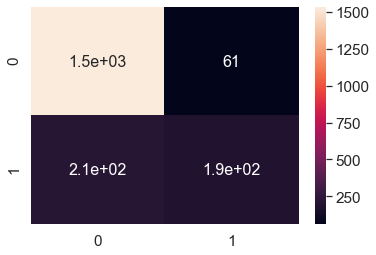

In [41]:
sns.set(font_scale=1.4) 
sns.heatmap(cm, annot=True, annot_kws={"size": 16}) 

plt.show()